In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
df = pd.read_csv('telecom.csv')
df

,ID,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Tariff plan,Status,Age group,Complaints,Churn
0,1,35,0,1420,41,36,20,1,A,Active,30-40,N,0
1,2,28,0,920,32,20,12,7,A,Active,Under 30,N,0
2,3,40,0,88,6,8,6,0,A,Inactive,30-40,N,1
3,4,38,0,13963,170,9,47,9,A,Active,30-40,N,0
4,5,38,0,13773,169,0,44,7,A,Active,30-40,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,3146,33,0,0,0,0,0,0,A,Inactive,Under 30,N,0
3146,3147,37,0,1370,40,24,7,5,A,Inactive,30-40,N,0
3147,3148,34,7,10320,88,3,43,18,A,Active,Over 40,N,0
3148,3149,23,0,1110,27,21,14,7,A,Active,Under 30,N,0


In [40]:
df = df.drop(columns=['ID', 'Tariff plan', 'Status', 'Age group'])
df

,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Complaints,Churn
0,35,0,1420,41,36,20,1,N,0
1,28,0,920,32,20,12,7,N,0
2,40,0,88,6,8,6,0,N,1
3,38,0,13963,170,9,47,9,N,0
4,38,0,13773,169,0,44,7,N,0
...,...,...,...,...,...,...,...,...,...
3145,33,0,0,0,0,0,0,N,0
3146,37,0,1370,40,24,7,5,N,0
3147,34,7,10320,88,3,43,18,N,0
3148,23,0,1110,27,21,14,7,N,0


In [41]:
df['Churn'] = 1 - df['Churn']
df

,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Complaints,Churn
0,35,0,1420,41,36,20,1,N,1
1,28,0,920,32,20,12,7,N,1
2,40,0,88,6,8,6,0,N,0
3,38,0,13963,170,9,47,9,N,1
4,38,0,13773,169,0,44,7,N,1
...,...,...,...,...,...,...,...,...,...
3145,33,0,0,0,0,0,0,N,1
3146,37,0,1370,40,24,7,5,N,1
3147,34,7,10320,88,3,43,18,N,1
3148,23,0,1110,27,21,14,7,N,1


In [42]:
df['Complaints'] = df['Complaints'].map({'N': 0, 'Y': 1})
df

,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Complaints,Churn
0,35,0,1420,41,36,20,1,0,1
1,28,0,920,32,20,12,7,0,1
2,40,0,88,6,8,6,0,0,0
3,38,0,13963,170,9,47,9,0,1
4,38,0,13773,169,0,44,7,0,1
...,...,...,...,...,...,...,...,...,...
3145,33,0,0,0,0,0,0,0,1
3146,37,0,1370,40,24,7,5,0,1
3147,34,7,10320,88,3,43,18,0,1
3148,23,0,1110,27,21,14,7,0,1


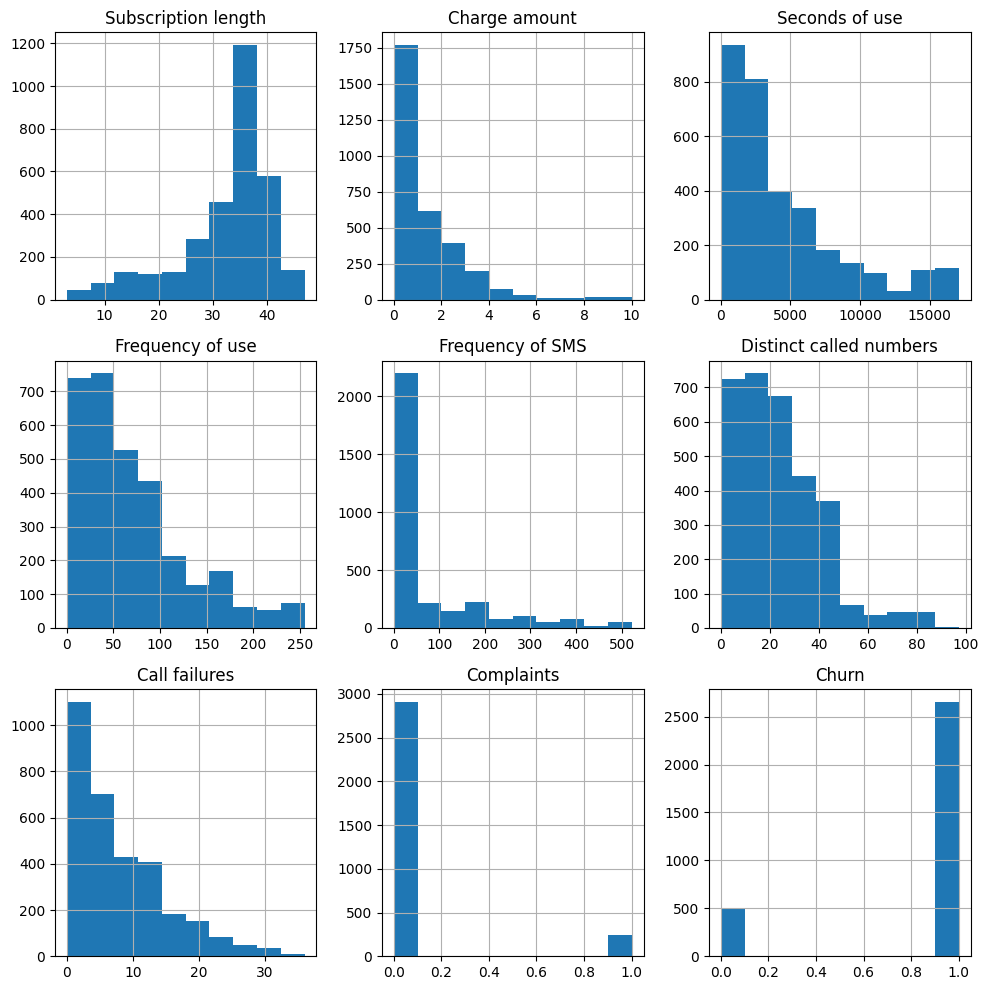

In [43]:
df.hist(figsize = (10, 10))
plt.tight_layout()
plt.show()

<Axes: >

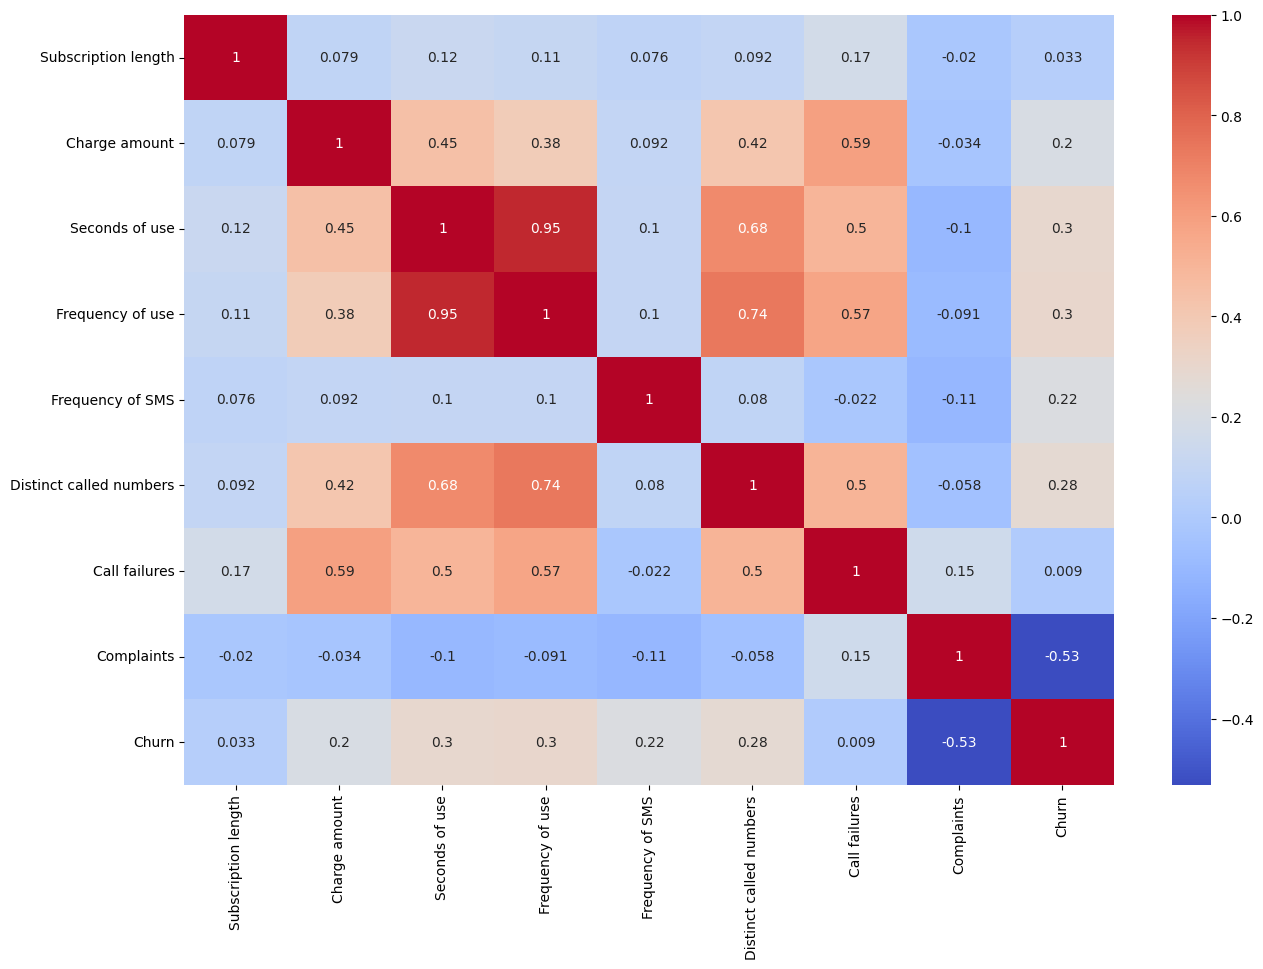

In [44]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Seems like Complaints is negatively correlated and seconds of use, frequency of use, distinct called numbers are positively correlated with churn. None are strongly correlated with Complaints being the strongest.

In [45]:
X = df[['Complaints', 'Seconds of use', 'Frequency of use', 'Distinct called numbers']]
y = df['Churn']
X

,Complaints,Seconds of use,Frequency of use,Distinct called numbers
0,0,1420,41,20
1,0,920,32,12
2,0,88,6,6
3,0,13963,170,47
4,0,13773,169,44
...,...,...,...,...
3145,0,0,0,0
3146,0,1370,40,7
3147,0,10320,88,43
3148,0,1110,27,14


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)
print("Train Accuracy: ", metrics.accuracy_score(y_train, ranfor.predict(X_train)))

Train Accuracy:  0.9742063492063492


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

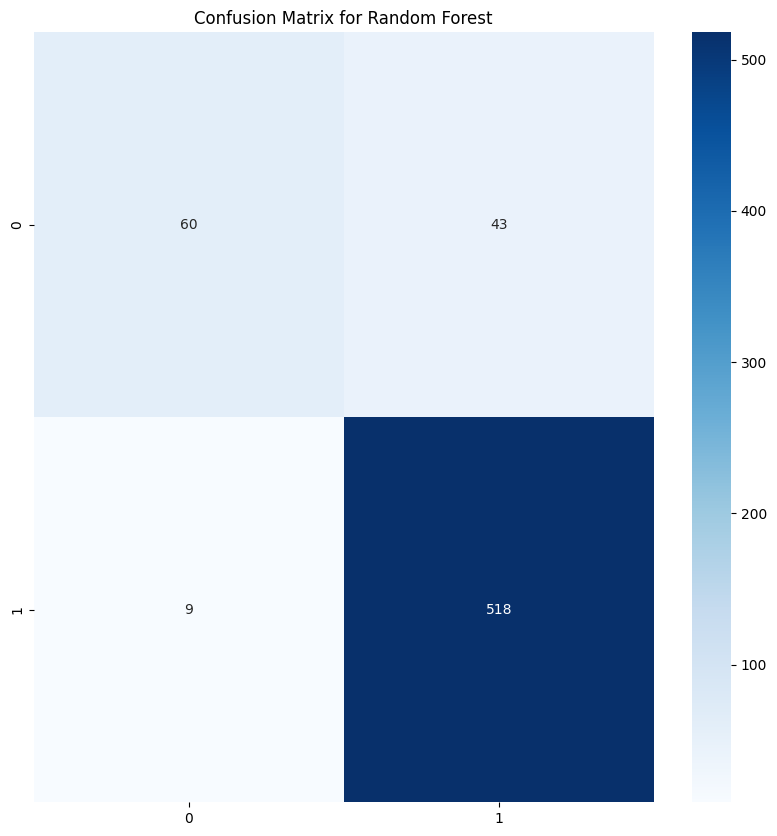

In [49]:
y_pred_ranfor = ranfor.predict(X_test)

fig = plt.figure(figsize=(10, 10))
cm_ranfor = confusion_matrix(y_test, y_pred_ranfor)
sns.heatmap(cm_ranfor, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')

In [50]:
cr_ranfor = classification_report(y_test, y_pred_ranfor, target_names=['Contract not continued', 'Contract continued'])
print(cr_ranfor)

                        precision    recall  f1-score   support

Contract not continued       0.87      0.58      0.70       103
    Contract continued       0.92      0.98      0.95       527

              accuracy                           0.92       630
             macro avg       0.90      0.78      0.82       630
          weighted avg       0.91      0.92      0.91       630



In [51]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Train Accuracy: ", metrics.accuracy_score(y_train, dt.predict(X_train)))

Train Accuracy:  0.9742063492063492


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

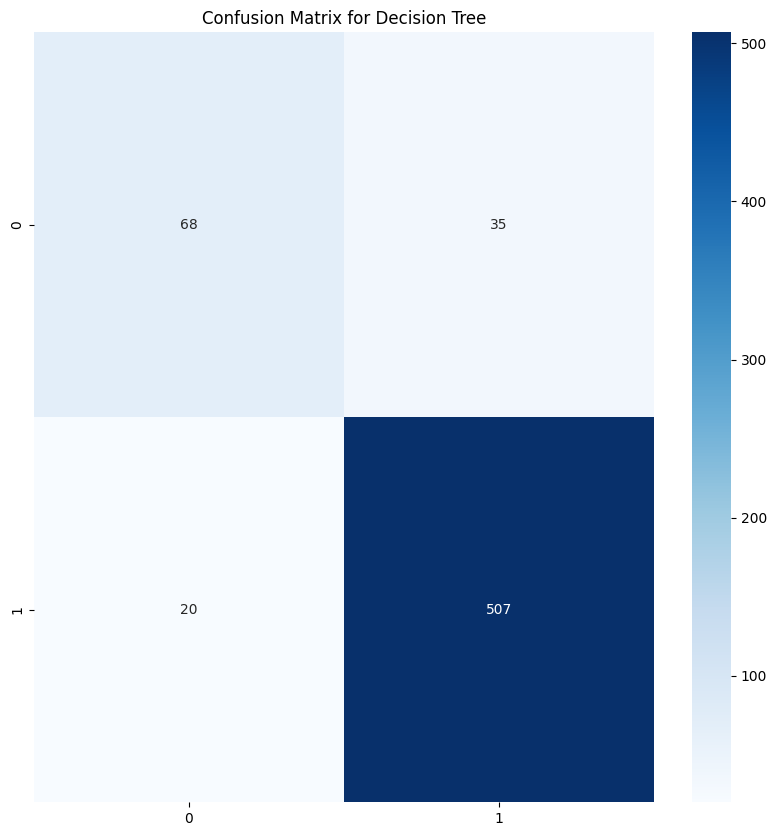

In [52]:
y_pred_dt = dt.predict(X_test)

fig = plt.figure(figsize=(10, 10))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')

In [53]:
cr_dt = classification_report(y_test, y_pred_dt, target_names=['Contract not continued', 'Contract continued'])
print(cr_dt)

                        precision    recall  f1-score   support

Contract not continued       0.77      0.66      0.71       103
    Contract continued       0.94      0.96      0.95       527

              accuracy                           0.91       630
             macro avg       0.85      0.81      0.83       630
          weighted avg       0.91      0.91      0.91       630

